# Definições e Tratamento de Dados

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
# Definindo todas as funções para as medidas de dispersão
def amplitude(x):
    return (x.max() - x.min())

def coeficiente_variacao(x):
    return 100*(x.std() / x.mean())

def desvio_medio(x):
  return abs(x-x.mean()).mean()

def q1(x):
  return x.quantile(0.25)

def q3(x):
  return x.quantile(0.75)

In [3]:
# Definindo o arquivo como df
df = pd.read_csv('csv_youtube/dados_youtubeTHM.csv')
df.head()

,Conteúdo,Título do vídeo,Horário de publicação do vídeo,"Marcações ""Gostei""",Inscrições obtidas,Porcentagem visualizada média (%),Duração média da visualização,Visualizações,Tempo de exibição (horas),Inscritos,Impressões
0,Total,NaN,NaN,19421,5475,26.90,0:04:51,358477,29063.6171,4987,4570652
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093


In [4]:
# Tratamento de Dados
novos_nomes = {
    'Conteúdo':'conteudo',
    'Título do vídeo':'titulo',
    'Horário de publicação do vídeo':'data_publicacao',
    'Marcações "Gostei"':'curtidas',
    'Inscrições obtidas':'inscricoes',
    'Porcentagem visualizada média (%)':'porcent_media_visualizacao',
    'Duração média da visualização':'duracao_media_visualizacao',
    'Visualizações':'views',
    'Tempo de exibição (horas)':'tempo_exibicao_h',
    'Inscritos':'inscritos',
    'Impressões':'impressoes'
}

df=df.rename(columns=novos_nomes)
df = df[df['titulo'].notna()]

In [5]:
df.head()

,conteudo,titulo,data_publicacao,curtidas,inscricoes,porcent_media_visualizacao,duracao_media_visualizacao,views,tempo_exibicao_h,inscritos,impressoes
1,XE4UHson59Y,Introdução | Estatística Básica 01,"Oct 5, 2020",1268,863,29.46,0:01:47,28631,852.5966,860,93596
2,tWcwNRBpViQ,Resumo de Dados | Estatística Básica 02,"Oct 5, 2020",858,216,45.42,0:05:08,12719,1089.6826,215,101217
3,SVH0EbN3QDE,Representações Gráficas I | Estatística Básica 03,"Oct 5, 2020",654,115,46.55,0:06:04,8952,907.4947,115,96059
4,RSRGO8U6rSU,"Parâmetros, Estimadores e Estimativas | Estatí...","Sep 22, 2021",602,179,30.24,0:05:00,13047,1089.2803,177,127093
5,uGexFqrNhw0,Introdução | Curso de Probabilidade 01,"Apr 16, 2021",584,331,17.91,0:02:23,11459,458.3918,330,47994


# Váriaveis das Colunas

*   'Conteúdo' -> Nominal (códigos de vídeos)
*   'Título do vídeo' -> Nominal (nomes dos vídeos)
*   'Horário de publicação do vídeo' -> Está ordinal (datas de publicação)
*   'Marcações Gostei' -> Discreta (contagem de "Gostei")
*   'Inscrições obtidas' -> Discreta (contagem de inscrições)
*   'Porcentagem visualizada média' -> Contínua (valores percentuais)
*   'Duração média da visualização' -> Contínua (tempo de visualização)
*   'Visualizações' -> Discreta (contagem de visualizações)
*   'Tempo de exibição horas' -> Contínua (tempo total de exibição em horas)
*   'Inscritos' -> Discreta (contagem de inscritos)
*   'Impressões' -> Discreta (contagem de impressões)

# Cálculos Iniciais

In [100]:
# Filtrando o df de acordo com a variável a ser analisada posteriormente
df_filtrado = df[['titulo','views']]
df_filtrado.head()
# pd.set_option('display.max_rows', None)
# df_filtrado

,titulo,views
1,Introdução | Estatística Básica 01,28631
2,Resumo de Dados | Estatística Básica 02,12719
3,Representações Gráficas I | Estatística Básica 03,8952
4,"Parâmetros, Estimadores e Estimativas | Estatí...",13047
5,Introdução | Curso de Probabilidade 01,11459


In [67]:
result = df.aggregate({
    'views': ['mean', 'std', 'min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio],
})

result.round(0).transpose()

,mean,std,min,q1,median,q3,max,amplitude,coeficiente_variacao,desvio_medio
views,1586.0,2769.0,4.0,185.0,634.0,2025.0,28631.0,28627.0,175.0,1576.0


## Análise inicial:

*   Podemos perceber que a média e mediana são muito distintas;
*   A dispersão na variável é muito grande, o que pode indicar quantidade significativa de Outliers;
*   A teoria dos Outliers é comprovada ao analisar o mínimo e o máximo, uma vez que resultam em uma amplitude elevada.

***

Uma justificação possível para alguns vídeos terem muitas visualizações e outros menos, é que, considerando a natureza da plataforma (o seu algoritmo) e o tema do canal ser voltado para o ensino, o público acessa apenas os vídeos em que possuem maior dificuldade no assunto ou apenas em períodos de provas. Outra ponto relevante a ser analisado é o conteúdo dos vídeos com mais views, já que eles podem nos dar um insight das matérias mais difíceis ou que caem mais em exames.

# Gráfico de Frequência

## Gráfico com escala voltada para a mediana

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


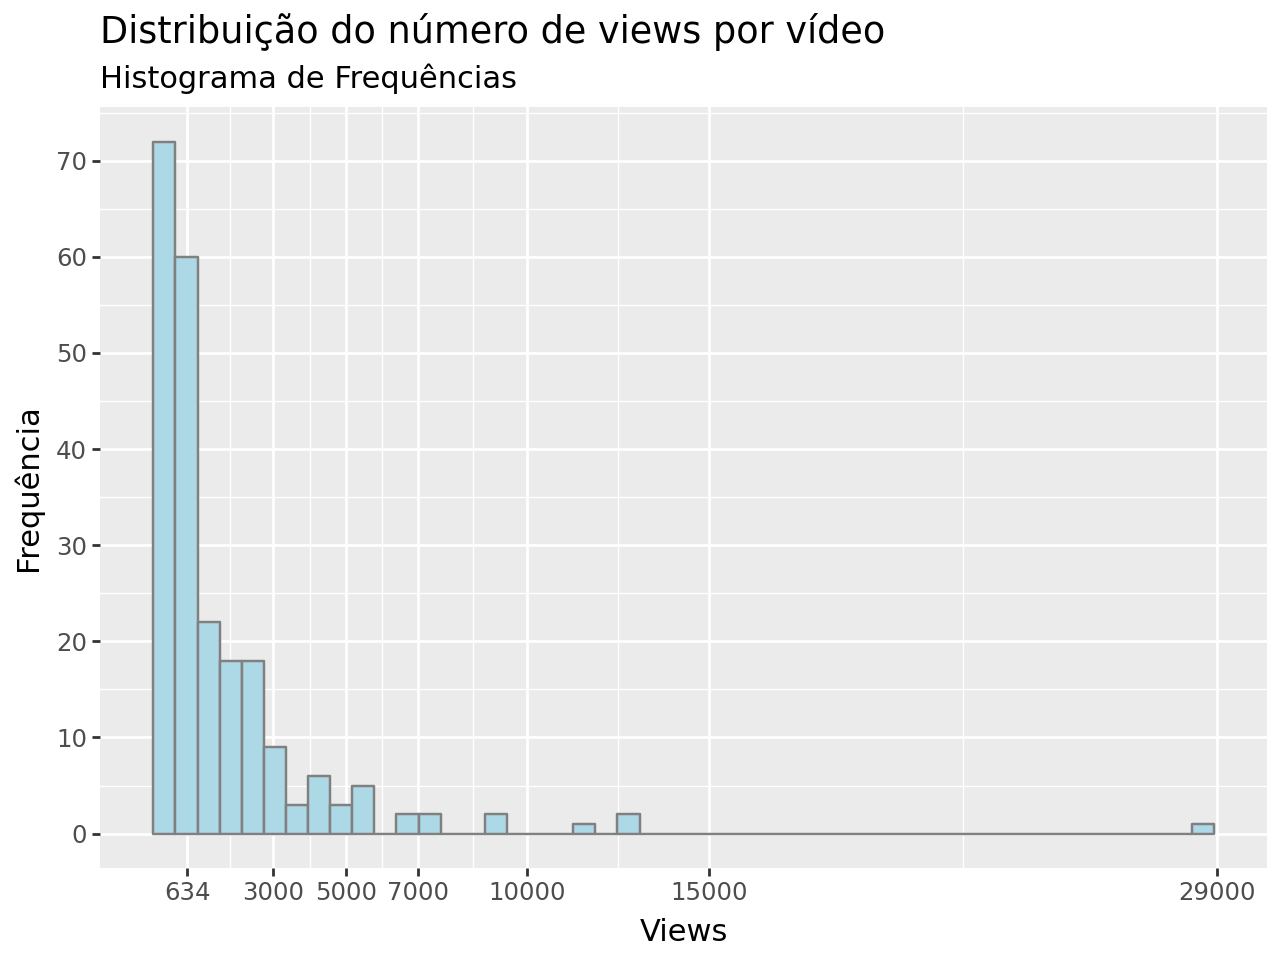

In [95]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='lightblue',colour='gray')+
 scale_x_continuous(breaks=[634, 3000, 5000, 7000, 10000, 15000, 29000])+
 scale_y_continuous(breaks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])+
 labs(x='Views',y='Frequência',title='Distribuição do número de views por vídeo',subtitle='Histograma de Frequências')
 )

## Gráfico com escala voltada para a média

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 48'. Pick better value with 'binwidth'.


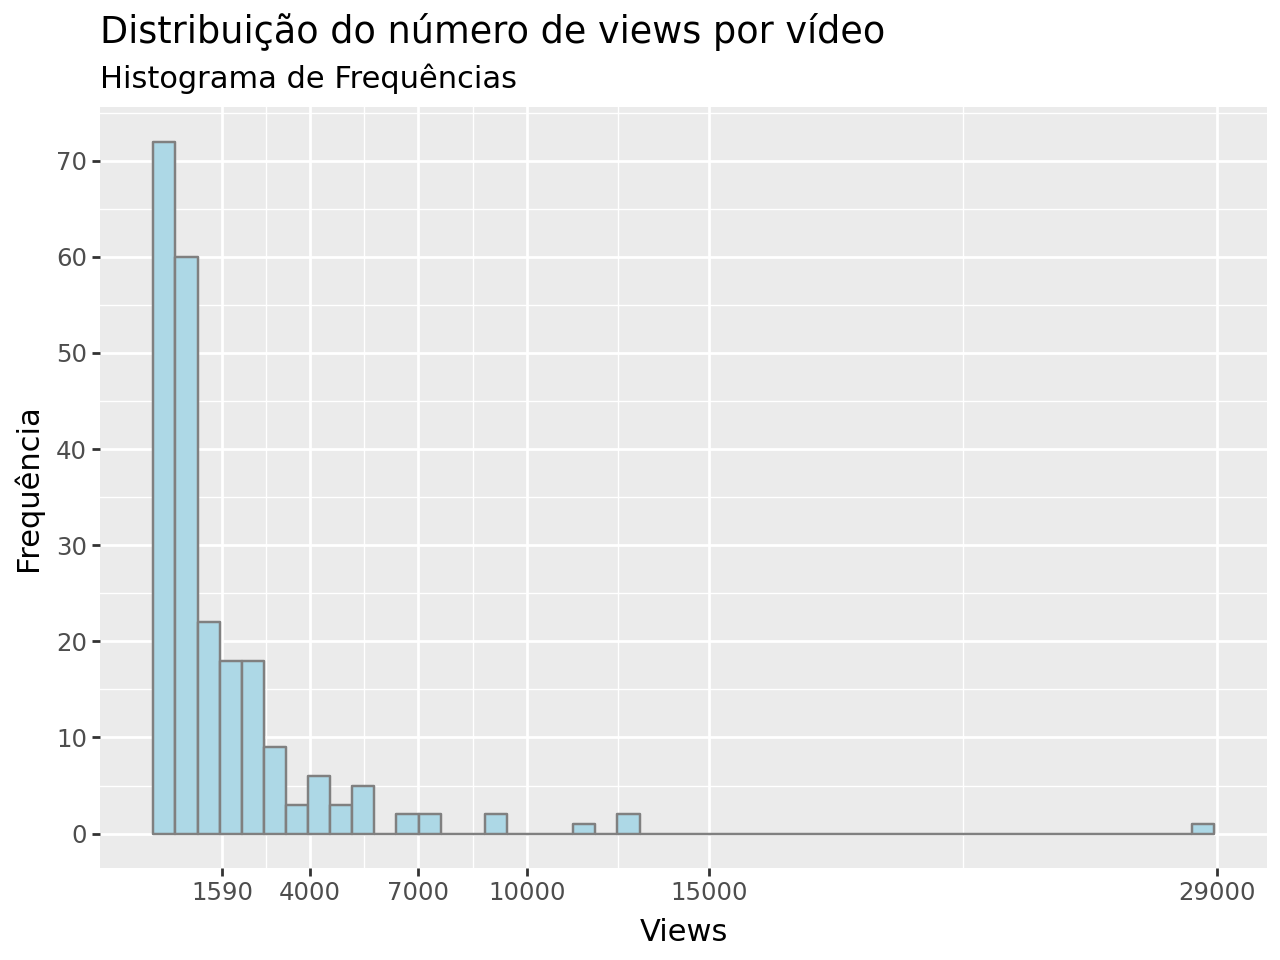

In [98]:
(ggplot(df_filtrado,aes(x='views'))+geom_histogram(fill='lightblue',colour='gray')+
 scale_x_continuous(breaks=[1590, 4000, 7000, 10000, 15000, 29000])+
 scale_y_continuous(breaks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])+
 labs(x='Views',y='Frequência',title='Distribuição do número de views por vídeo',subtitle='Histograma de Frequências')
 )

## Análise dos gráficos de frequência
De acordo com os gráficos acima, é possível observar que o valor da mediana se encontra em um local com alta frequência de visualizações, ao contrário da média, a qual está localizada em uma frequência menor. O que era o esperado, uma vez que já havíamos chegado na conclusão de que os valores eram distantes.

Além disso, percebe-se alta concentração de vídeos abaixo de 3000 visualizações, diminuindo a frequência conforme as visualizações aumentam.

Outro fator relevante é que possui um intervalo entre o 15 e 29 mil, podendo considerar o último valor como outlier


# Divisão por Playlists

In [112]:
def define_playlist(titulo):
  if 'Estatística' in titulo:
    return 'Estatística'
  elif 'Probabilidade' in titulo:
    return 'Probabilidade'
  else:
    return 'Outras'

df_filtrado.loc[:, 'playlist'] = df_filtrado['titulo'].apply(define_playlist)
df_filtrado.head()

,titulo,views,playlist
1,Introdução | Estatística Básica 01,28631,Estatística
2,Resumo de Dados | Estatística Básica 02,12719,Estatística
3,Representações Gráficas I | Estatística Básica 03,8952,Estatística
4,"Parâmetros, Estimadores e Estimativas | Estatí...",13047,Estatística
5,Introdução | Curso de Probabilidade 01,11459,Probabilidade


In [104]:
# Usando aggregate para calcular as estatísticas
result_playlist = df_filtrado.groupby(['playlist']).aggregate({
    'views': ['count', 'mean','std','min',q1,'median',q3,'max', amplitude, coeficiente_variacao,desvio_medio]
})

result_playlist.round(0)

views                                                    \
              count    mean     std min     q1  median      q3    max   
playlist                                                                
Estatística      71  2787.0  4278.0   4  222.0  1707.0  3978.0  28631   
Outras           56   258.0   317.0   8   30.0   125.0   387.0   1733   
Probabilidade    99  1476.0  1555.0  47  522.0  1041.0  1998.0  11459   

                                                           
              amplitude coeficiente_variacao desvio_medio  
playlist                                                   
Estatística       28627                153.0       2666.0  
Outras             1725                123.0        237.0  
Probabilidade     11412                105.0       1049.0

Depois de analisar a tabela, chegamos nas seguintes conclusões:
 - Apesar da playlist de Probabilidade ter maior quantidade de vídeos, seu mínimo é o maior de todos. Isso pode significar que bastante gente busca assistir os vídeos de probabilidade com maior constância.
 - Estatística apresenta o máximo maior de todos, o que significa que possui um vídeo viral dentro da playlist (um outlier, como visto nos gráficos de frequência). Dessa forma, contribuindo para sua medida de dispersão aumentar em relação às outras playlist e sua média ficar bem diferente da mediana.
 - Em todas as medidas de dispersão, a Estatística possui maior valor, provavelmente por causa do outlier.
 - A playlist de Outras é a que possui menor diferença entre a média e a mediana, contribuindo para ter o menor valor de dispersão.

## BoxPlot por Playlist

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


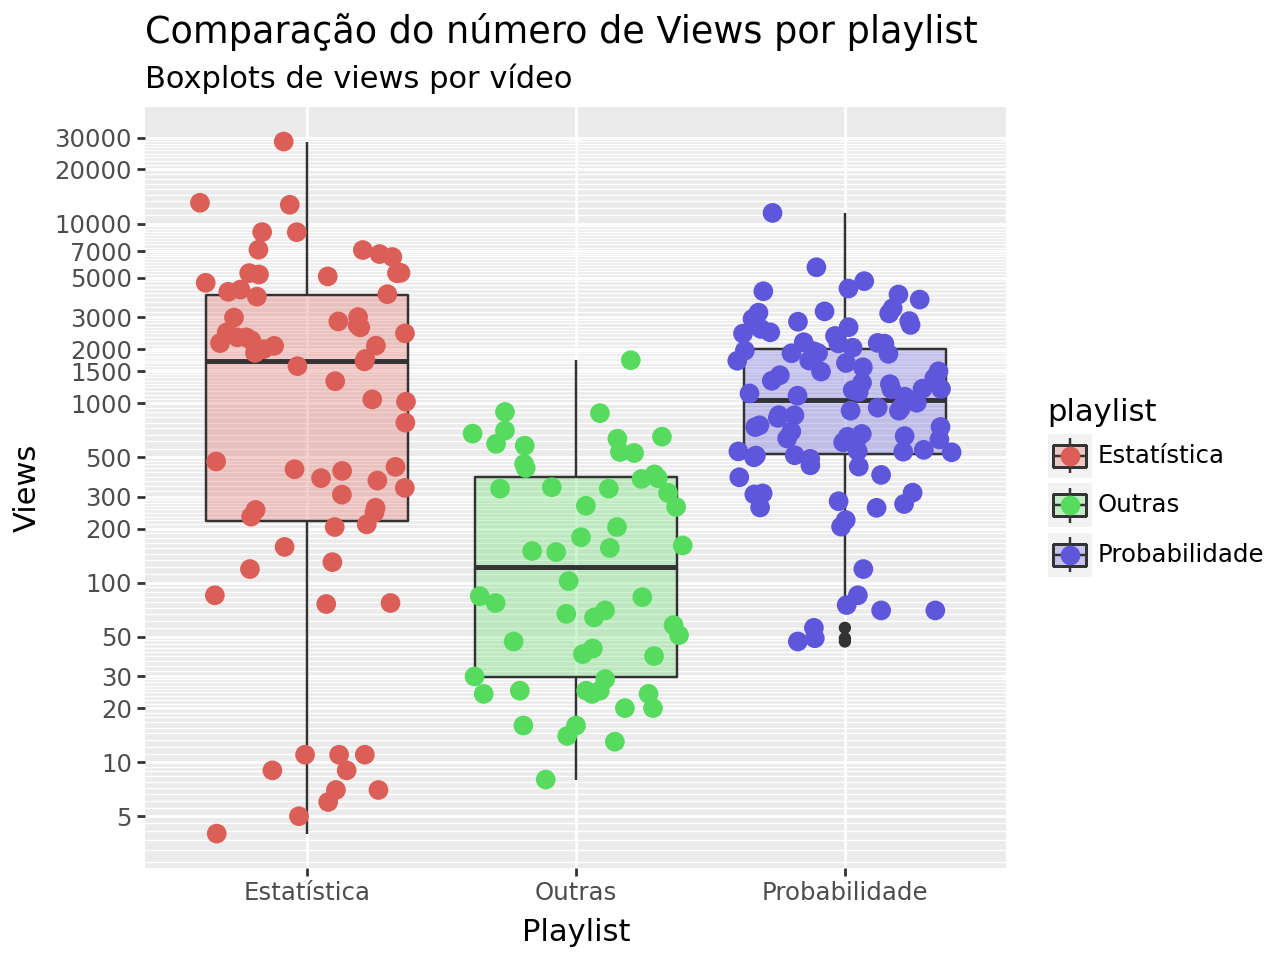

In [109]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_boxplot(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0, 1, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 1500, 2000, 3000, 5000, 7000, 10000, 20000, 30000])+
 labs(x='Playlist',y='Views',title='Comparação do número de Views por playlist',subtitle='Boxplots de views por vídeo')
)

- Nesse gráfico fica nítido perceber o tamanho da dispersão de cada playlist.
- Podemos perceber que a de Estatística possui maior tamanho e assimetria, enquanto a de Probabilidade é a menor e mais simétrica.
- A de Probabilidade é a mais previsível e a de Estatística é a menos previsível.

Uma justificativa possível para isso poderia ser que Probabilidade é um assunto mais difícil, por isso, as pessoas assistem mais constantemente. Já a de estatística seria mais para relembrar antes de uma prova

C:\Users\Carolina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotnine\scales\scale_continuous.py:221: RuntimeWarning: divide by zero encountered in log10


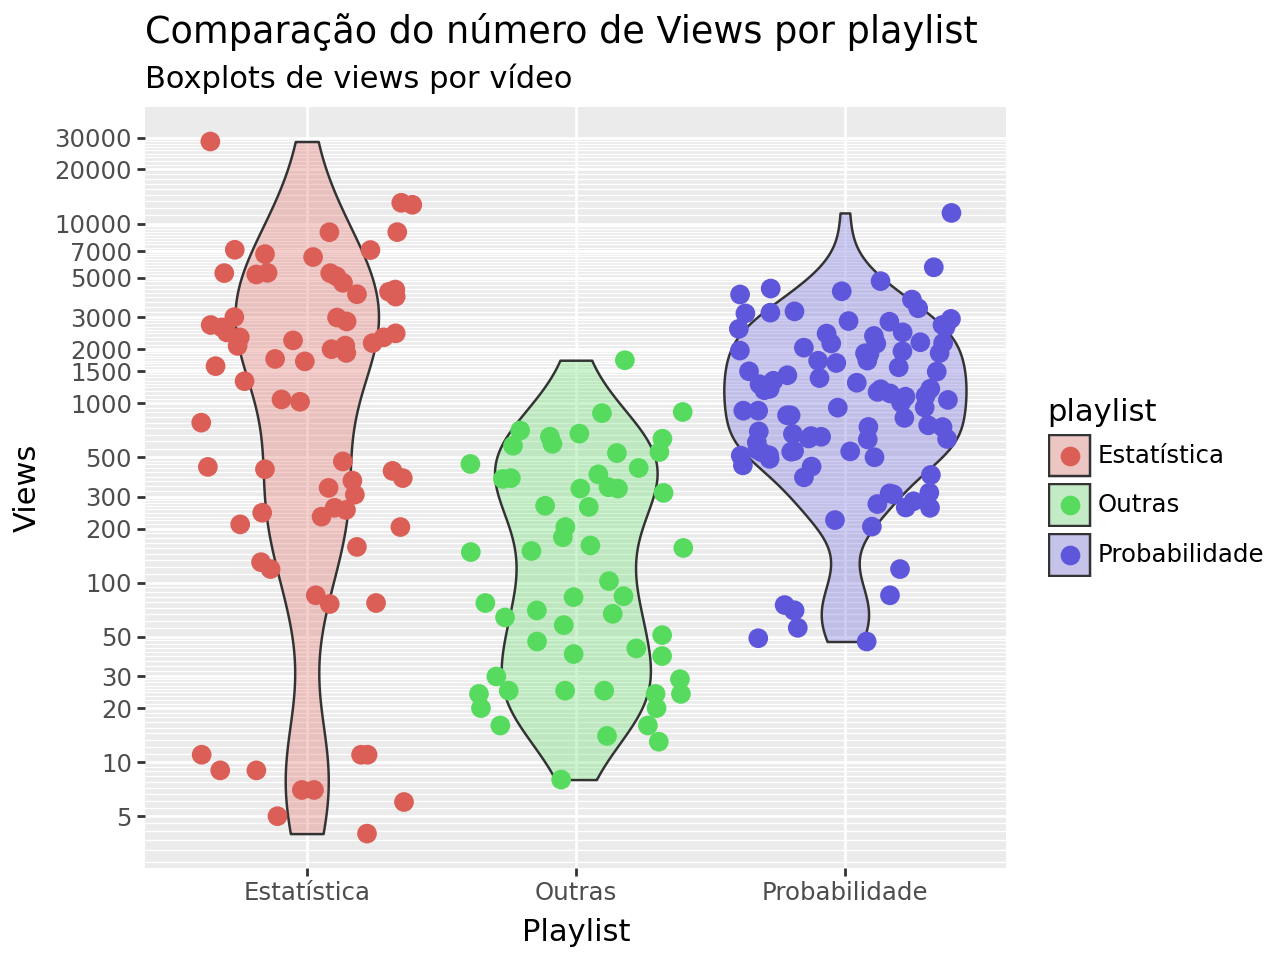

In [111]:
(ggplot(df_filtrado,aes(x='playlist',y='views'))+
 geom_violin(aes(fill='playlist'),alpha=0.3)+
 geom_jitter(aes(colour='playlist'),size=3)+
 scale_y_log10(breaks=[0, 1, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000, 1500, 2000, 3000, 5000, 7000, 10000, 20000, 30000])+
 labs(x='Playlist',y='Views',title='Comparação do número de Views por playlist',subtitle='Boxplots de views por vídeo')
)

Esse gráfico facilita a visibilidade de acordo com a frequência de cada playlist. Dessa forma podemos analisar a média e mediana de cada
- Estatística: percebe-se que a média (2787) está localizada onde possui maior frequência do que a mediana (222), isso se deve por causa da grande dispersão, pois o meio da playlist não estará perto nem do começo nem do fim da frequência.
- Outras: ambas a média (258) e a mediana (30) estão localizadas em locais com alta frequência, uma vez que, apesar de estarem distantes, os valores frequentes também então distantes, apresentando duas regiões com maior ocorrência. Isso pode acontecer por se tratar de assuntos muito variados, podendo ter conteúdos mais relevantes do que outros.
- Probabilidade: Ambas a média (1476) e a mediana (522) estão localizadas nas extremidades do local com maior frequência, isso pode acontecer pelo fato da frequência estar constantemente concentrada, por se tratar uma playlist simétrica e previsível, a maioria dos valores dentro do boxplot estarão em uma alta frequência.